## *santoshhulbutti@gmail.com | DataTrained | Evaluation Project # 05

## census_income

<h1 align = "center"><font color = "red">Importing necessary libraries</font></h1>

In [179]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')

pd.set_option('display.max_columns', None)

import statsmodels.api as sm

from collections import Counter

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV

#logistic Regression
from sklearn.linear_model import LogisticRegression

# Random Forest Classifier & Gradient Boosting Classifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

# K Neighbors Classifier
from sklearn.neighbors import KNeighborsClassifier

#C-Support Vector Classification
from sklearn.svm import SVC


from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix, classification_report, f1_score, roc_auc_score, accuracy_score, roc_curve, auc




# from sklearn.linear_model import LinearRegression, Ridge, Lasso, LassoCV

# from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor

# from sklearn.tree import DecisionTreeRegressor

# from sklearn.svm import SVR

# from sklearn.neighbors import KNeighborsRegressor

# from xgboost import XGBRegressor

# from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score




import pickle

import warnings
warnings.filterwarnings('ignore')

<h1 align = "center"><font color = "red">Getting the Data</font></h1>

In [221]:
data_url = "https://raw.githubusercontent.com/santoshhulbutti/-DataTrained_Evaluation_Projects/main/Census%20Income%20Project/census_income.csv"

data0 = pd.read_csv(data_url)

<h1 align="center"><font color = "red">Data Visualization & EDA</font> </h1>

<h2><font color = "blue">01. Checking the data using .head(), .shape, features' dtypes using .info()</font></h2>

In [222]:
data0.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [223]:
data0.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [224]:
data0.shape

(32560, 15)

In [225]:
unique_null_data = pd.DataFrame(list(zip(data0.nunique(), data0.isnull().sum(), data0.dtypes)),
                                columns = ['unique_entries', 'missing values', 'Dtypes'],
                               index=data0.columns)
unique_null_data

,unique_entries,missing values,Dtypes
Age,73,0,int64
Workclass,9,0,object
Fnlwgt,21647,0,int64
Education,16,0,object
Education_num,16,0,int64
Marital_status,7,0,object
Occupation,15,0,object
Relationship,6,0,object
Race,5,0,object
Sex,2,0,object


In [226]:
data0.dtypes.value_counts()

object    9
int64     6
dtype: int64

### Observation:
The data set has 32560 rows of data & 15 Columns.

1. there are 6 integer type of feature and some of them are categorical in nature.
2. 9 eatures of object datatype consisting ordinal & nominal categories.
3. Income feature is the label column.

<h2><font color = "blue">03. Checking for descriptive statistics...</font></h2>

In [227]:
#Descriptive statistics
data0.describe(include ='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,32560.0,NaN,NaN,NaN,38.581634,13.640642,17.0,28.0,37.0,48.0,90.0
Workclass,32560,9,Private,22696,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fnlwgt,32560.0,NaN,NaN,NaN,189781.814373,105549.764924,12285.0,117831.5,178363.0,237054.5,1484705.0
Education,32560,16,HS-grad,10501,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Education_num,32560.0,NaN,NaN,NaN,10.08059,2.572709,1.0,9.0,10.0,12.0,16.0
Marital_status,32560,7,Married-civ-spouse,14976,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Occupation,32560,15,Prof-specialty,4140,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Relationship,32560,6,Husband,13193,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Race,32560,5,White,27815,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sex,32560,2,Male,21789,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [228]:
#Descriptive statistics
data0.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,32560.0,38.581634,13.640642,17.0,28.0,37.0,48.0,90.0
Fnlwgt,32560.0,189781.814373,105549.764924,12285.0,117831.5,178363.0,237054.5,1484705.0
Education_num,32560.0,10.080590,2.572709,1.0,9.0,10.0,12.0,16.0
Capital_gain,32560.0,1077.615172,7385.402999,0.0,0.0,0.0,0.0,99999.0
Capital_loss,32560.0,87.306511,402.966116,0.0,0.0,0.0,0.0,4356.0
Hours_per_week,32560.0,40.437469,12.347618,1.0,40.0,40.0,45.0,99.0


### Observation:
1. We see no missing observation from count. every feature has 1470 number of entries.
2. there are some entries/observations where the minimum value of features was 0.0.

In [229]:
num_cols = ['Age','Fnlwgt','Capital_gain', 'Capital_loss', 'Hours_per_week']
# cat_cols = []
# for column in data0.columns:
#     if column in num_cols:
#         pass
#     else:
#         cat_cols.append(column)
cat_cols = ['Workclass','Education','Education_num','Marital_status','Occupation',
            'Relationship','Race','Sex','Native_country','Income']

In [230]:
for column in cat_cols:
    print("==================")
    print(' ')
    print('Unique entries in "'+ column + '" features are;')
    print(' ')
    print(data0[column].value_counts())
    print(' ')

 
Unique entries in "Workclass" features are;
 
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64
 
 
Unique entries in "Education" features are;
 
 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64
 
 
Unique entries in "Education_num" features are;
 
9     10501
10     7291
13     5354
14     1723
11     1382
7      1175
12     1067
6       933
4       646
15      576
5       514
8       433
16      413
3       333
2       1

<h2><font color = "blue">02. Checking for duplicate entries...</font></h2>

In [231]:
data0.duplicated().sum()

24

### Observations:
1. 24 Duplicate entries.

In [232]:
data0.drop_duplicates(inplace=True)

In [233]:
data0.duplicated().sum()

0

<h2><font color = "blue">05. Checking entries with ZERO Value...</font></h2>

In [234]:
data0[data0 == 0.0].count()#*100/data0.shape[0]

Age                   0
Workclass             0
Fnlwgt                0
Education             0
Education_num         0
Marital_status        0
Occupation            0
Relationship          0
Race                  0
Sex                   0
Capital_gain      29825
Capital_loss      31017
Hours_per_week        0
Native_country        0
Income                0
dtype: int64

### Observation:
1. NumCompaniesWorked has 197 zero values implying, 197 employees have never changed their jobs.
2. StockOptionLevel has 631 zero entries.
3. TotalWorkingYears has 11 zero values, meaning 11 employess just got their first job.
4. TrainingTimesLastYear has 54 zero entries, it means 54 employees havent attended any training in the last year.
5. 244 employees were never promoted to new role.
6. 581 employees recently promoted.
7. 263 employees started working with new manager.

In [235]:
data0[num_cols].dtypes

Age               int64
Fnlwgt            int64
Capital_gain      int64
Capital_loss      int64
Hours_per_week    int64
dtype: object

In [236]:
data0[cat_cols].dtypes

Workclass         object
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Native_country    object
Income            object
dtype: object

### Converting categorical features with integer values to string/object dtype

In [237]:
for feat in data0[cat_cols].columns:
    if data0[feat].dtype !='object':
        data0[feat] = data0[feat].astype(str)

In [238]:
data0[cat_cols].dtypes

Workclass         object
Education         object
Education_num     object
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Native_country    object
Income            object
dtype: object

In [241]:
# replacing '?' with mode of the respective feature
data0["Workclass"] = data0["Workclass"].str.replace('?',(data0["Workclass"].mode()[0]))
data0["Occupation"] = data0["Occupation"].str.replace('?',(data0["Occupation"].mode()[0]))
data0["Native_country"] = data0["Native_country"].str.replace('?',(data0["Native_country"].mode()[0]))

In [242]:
#reducing reduntant unique values in a feature


data0["Education"] = data0["Education"].replace(['Preschool','1st-4th','5th-6th','7th-8th','9th','10th'],'School',regex=True)
data0["Education"] = data0["Education"].replace(['11th','12th','Some-college','HS-grad'],'Jr. College',regex=True)
data0["Education"] = data0["Education"].replace(['Assoc-voc','Assoc-acdm','Prof-school'],'Higher College',regex=True)
data0["Education"] = data0["Education"].replace('Bachelors','UG',regex=True)
data0["Education"] = data0["Education"].replace('Masters','PG',regex=True)


data0["Marital_status"] = data0["Marital_status"].replace(['Married-civ-spouse','Married-AF-spouse'],'Married',regex=True)
data0["Marital_status"] = data0["Marital_status"].replace(['Divorced', 'Widowed', 'Married-spouse-absent'],'Separated',regex=True)
data0["Marital_status"] = data0["Marital_status"].replace('Never-married','Single',regex=True)


In [243]:
data1 =data0.copy()

In [244]:
data1['Income'] = data1['Income'].replace('<=50K', 0,regex=True)
data1['Income'] = data1['Income'].replace('>50K', 1,regex=True)

In [245]:
data1 = data1.reset_index(drop=True)

In [246]:
data1

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,UG,13,Married,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
1,38,Private,215646,Jr. College,9,Separated,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
2,53,Private,234721,Jr. College,7,Married,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
3,28,Private,338409,UG,13,Married,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
4,37,Private,284582,PG,14,Married,Exec-managerial,Wife,White,Female,0,0,40,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32531,27,Private,257302,Higher College,12,Married,Tech-support,Wife,White,Female,0,0,38,United-States,0
32532,40,Private,154374,Jr. College,9,Married,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
32533,58,Private,151910,Jr. College,9,Separated,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0
32534,22,Private,201490,Jr. College,9,Single,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0


<h2 align="center"><font color = "red">EDA : Data Visualization</font> </h2>

### Numerical features :
- Age
- DailyRate
- DistanceFromHome
- HourlyRate
- MonthlyIncome
- MonthlyRate
- PercentSalaryHike
- TotalWorkingYears
- YearsAtCompany
- YearsInCurrentRole
- YearsSinceLastPromotion
- YearsWithCurrManager

### Categorical features :
- BusinessTravel
- Department
- Education
- EducationField
- EnvironmentSatisfaction
- Gender
- JobInvolvement
- JobLevel
- JobRole
- JobSatisfaction
- MaritalStatus
- NumCompaniesWorked
- OverTime
- PerformanceRating
- RelationshipSatisfaction
- tockOptionLevel
- TrainingTimesLastYear
- WorkLifeBalance

In [247]:
data1_num = data1[num_cols]
data1_cat = data1[cat_cols]

## 06 Univariate Analysis

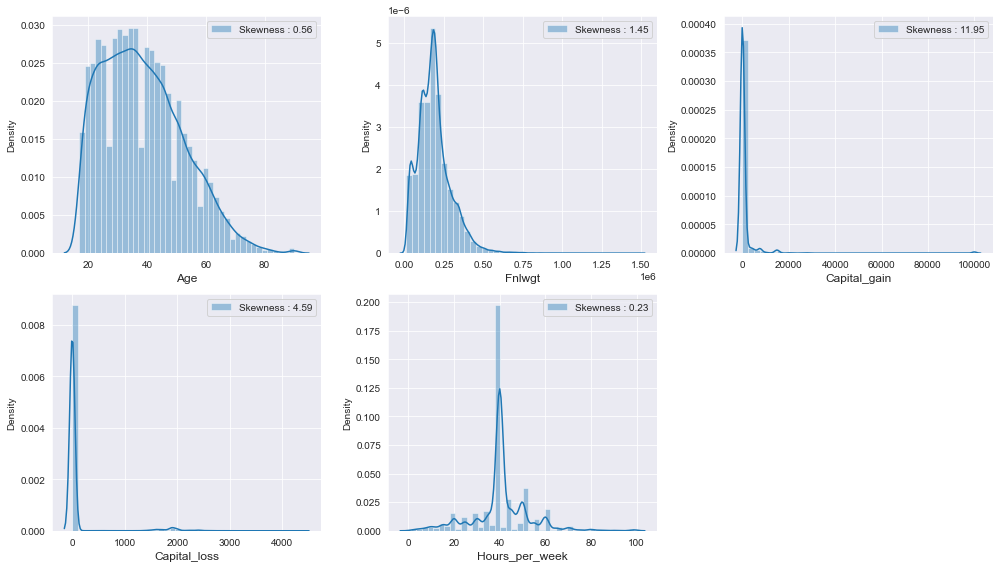

In [249]:
#distribution of numerical features.. 
i=0
plt.figure(figsize=(14,8))
for column in data1_num.columns:
    plt.subplot(2,3,i+1)
    sns.distplot(data1_num[column], bins=40, label="Skewness : %.2f"%(data1_num[column].skew())).legend(loc="best")
    plt.xlabel(column,fontsize=12)
    i+=1
    
plt.tight_layout()

### Observation:
1. Age seems to have close to normal distribution with some outliers.
2. Daily hourly & monthly rate have uniform distribution.
3. All other features dont have normal distribution & they are skewed with some outliers also.

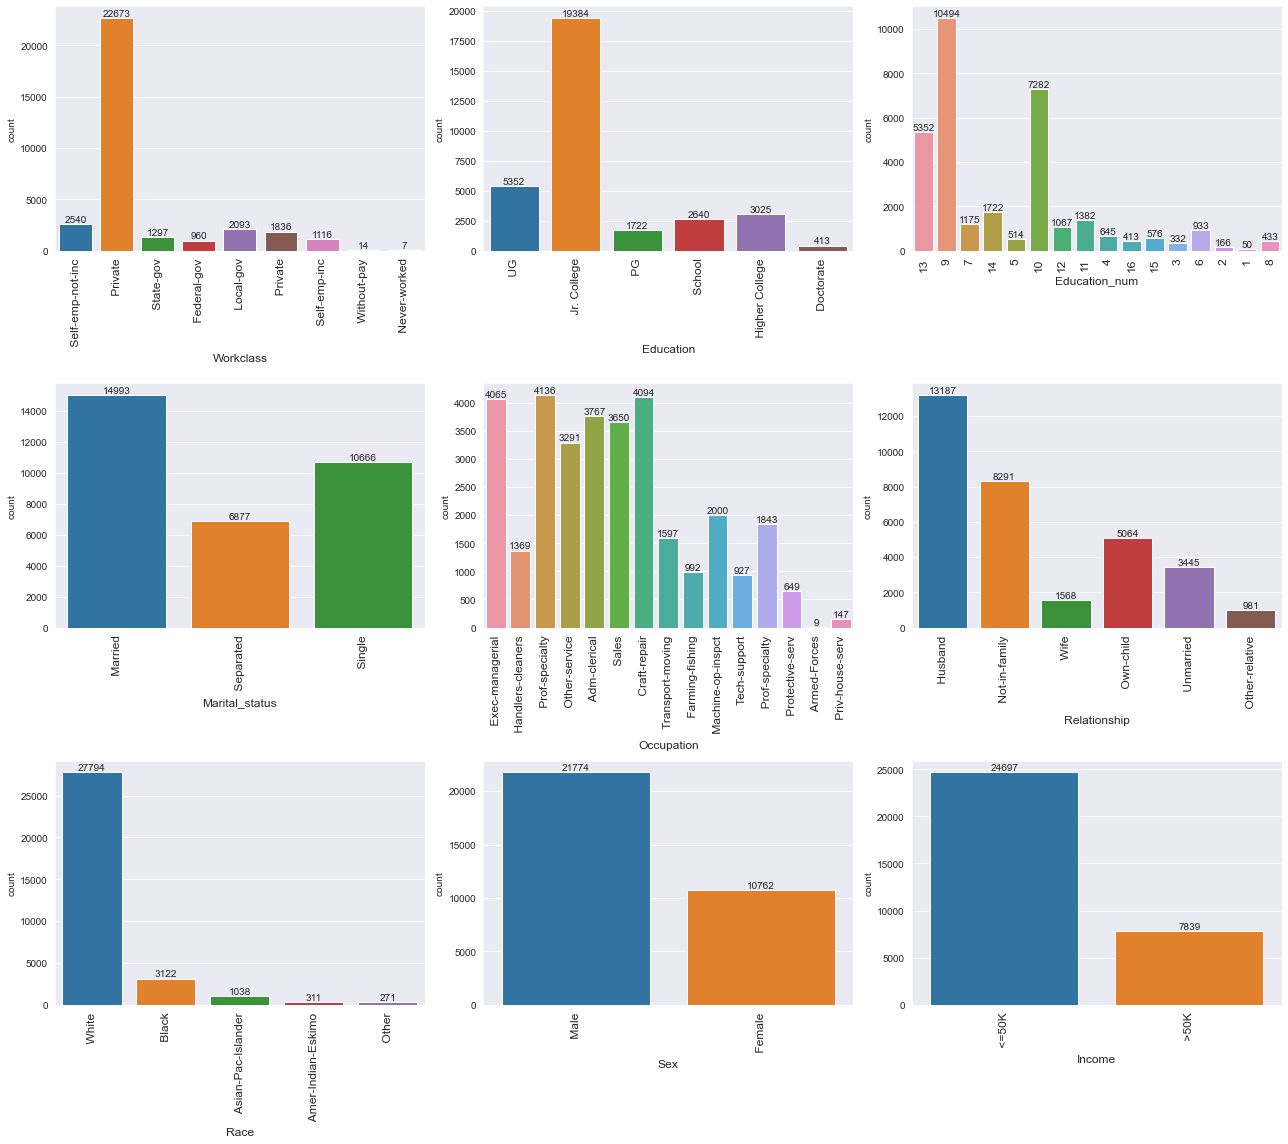

In [250]:
#distribution of numerical features using countplot
i=0
plt.figure(figsize=(18,16))
for column in data1_cat.columns:
    if column != 'Native_country':
        plt.subplot(3,3,i+1)
        ax = sns.countplot(x= data0[column])
        ax.bar_label(ax.containers[0]);
        plt.xticks(fontsize = 12, rotation=90)
        plt.xlabel(column,fontsize=12)
        i+=1
    
plt.tight_layout()

## 07 Bivariate Analysis

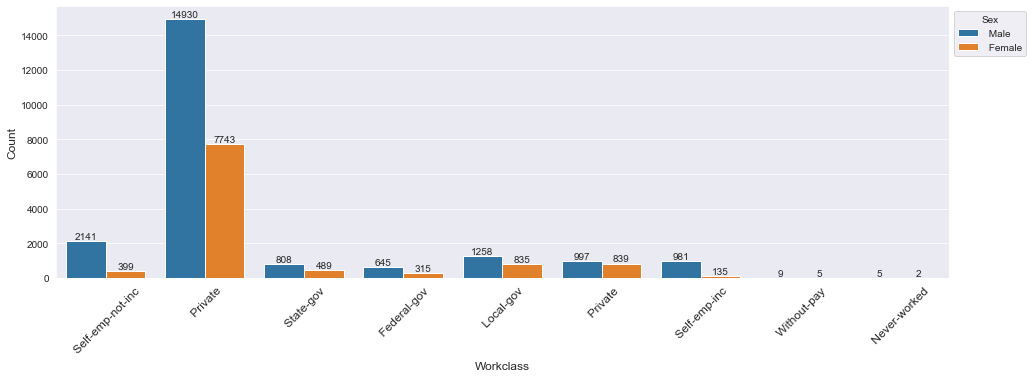

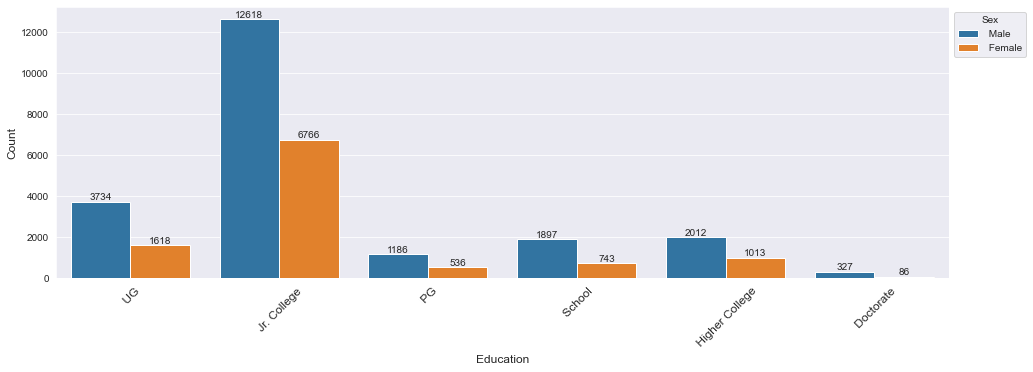

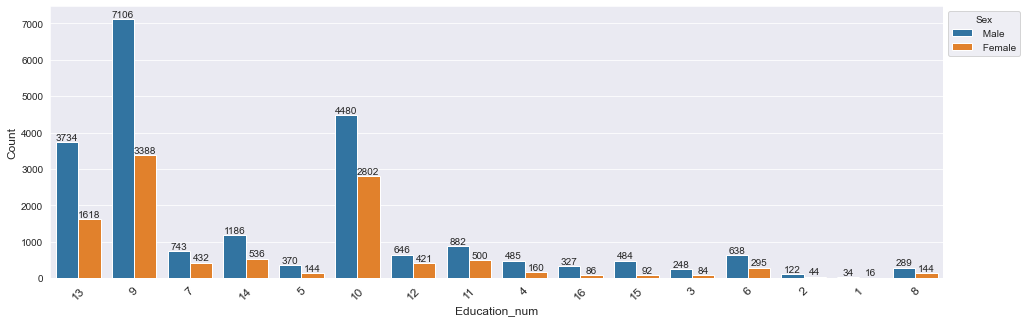

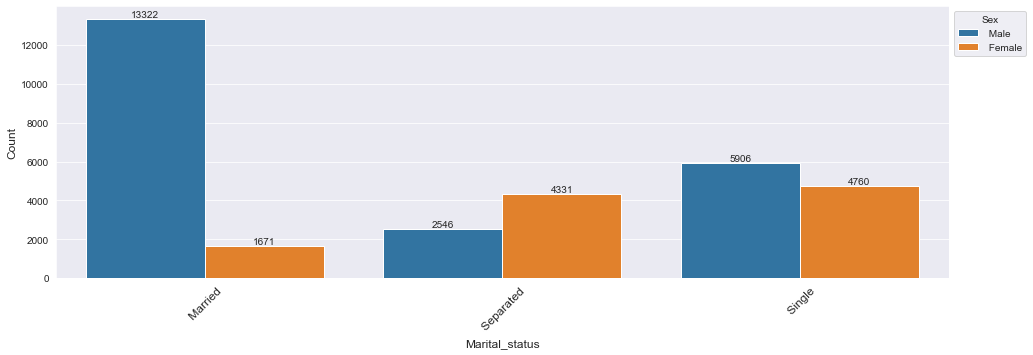

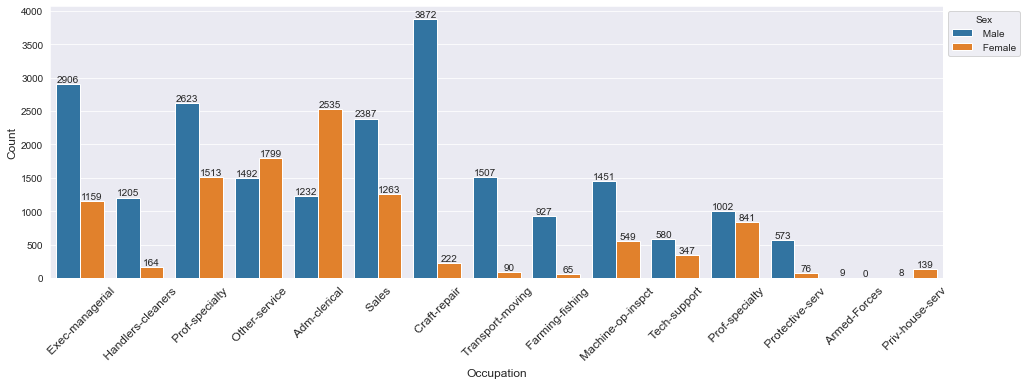

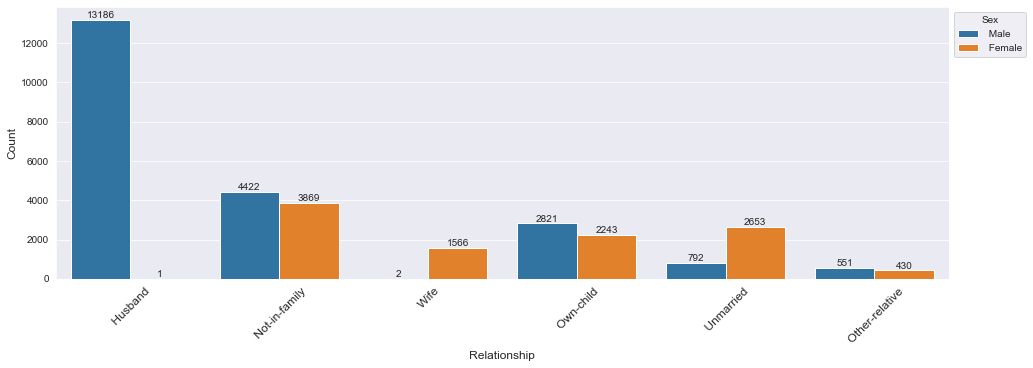

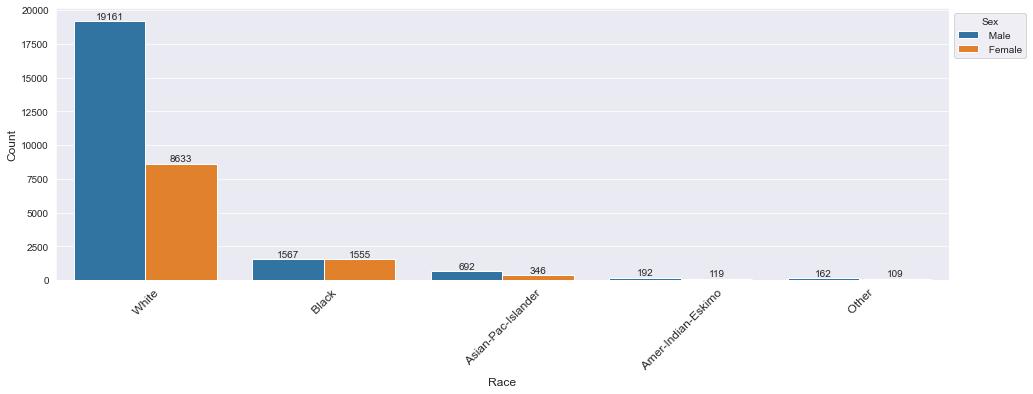

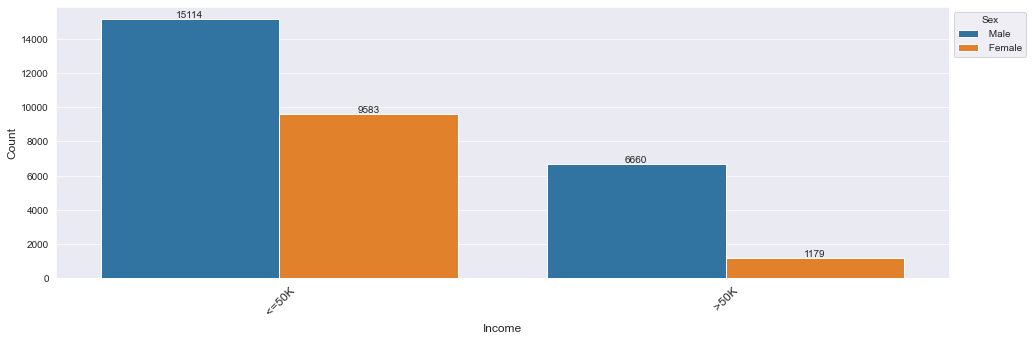

In [251]:
for item in data1_cat[['Workclass','Education','Education_num','Marital_status','Occupation',
            'Relationship','Race','Income']].columns:
    plt.figure(figsize=(16,5))
    ax = sns.countplot(x=item,hue='Sex',data=data0)
    sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
    ax.bar_label(ax.containers[0]);
    ax.bar_label(ax.containers[1]);
    plt.xticks(fontsize = 12, rotation=45)
    plt.ylabel(ylabel = 'Count', fontsize = 12)
    plt.xlabel(xlabel = item, fontsize = 12)
    plt.show()

### Observation:
1. The above graphs show, how other categorical features are distributed based on Gender Male & Female.

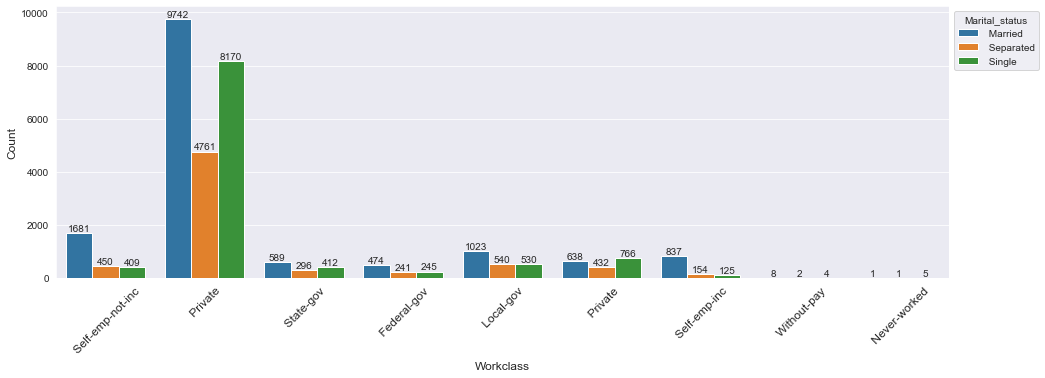

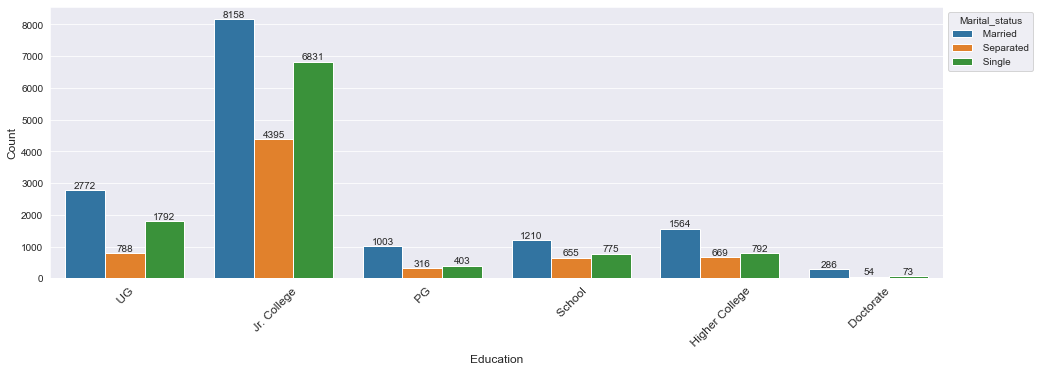

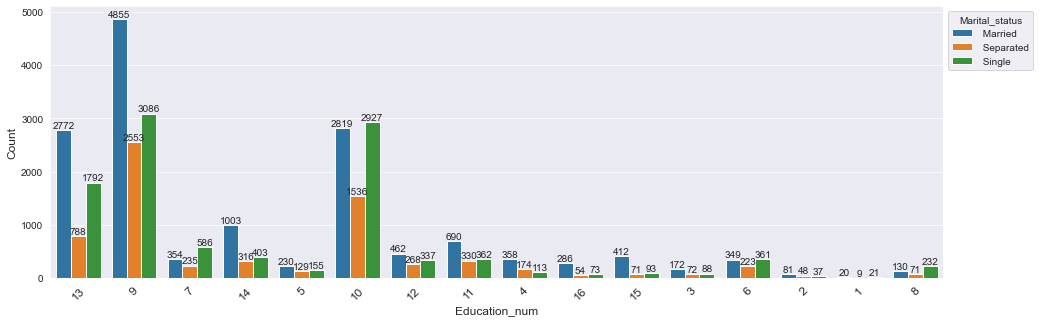

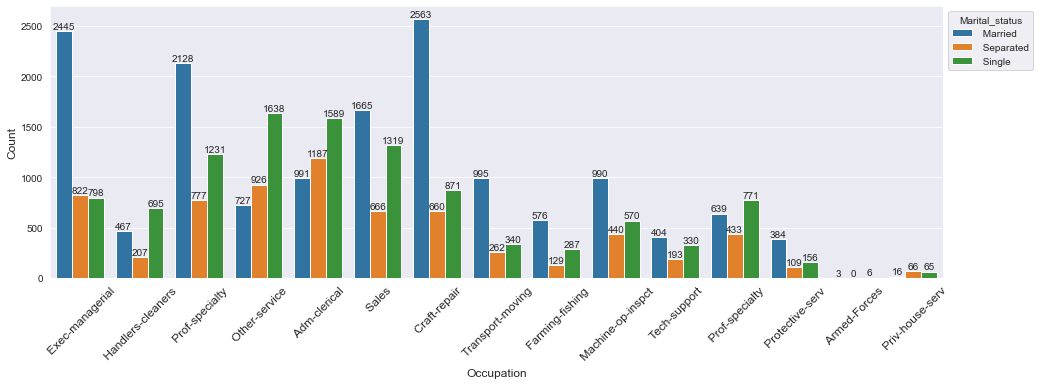

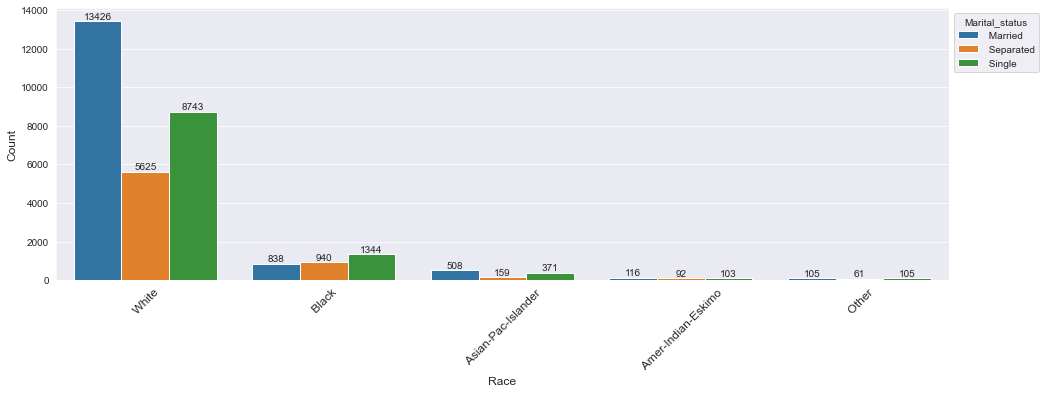

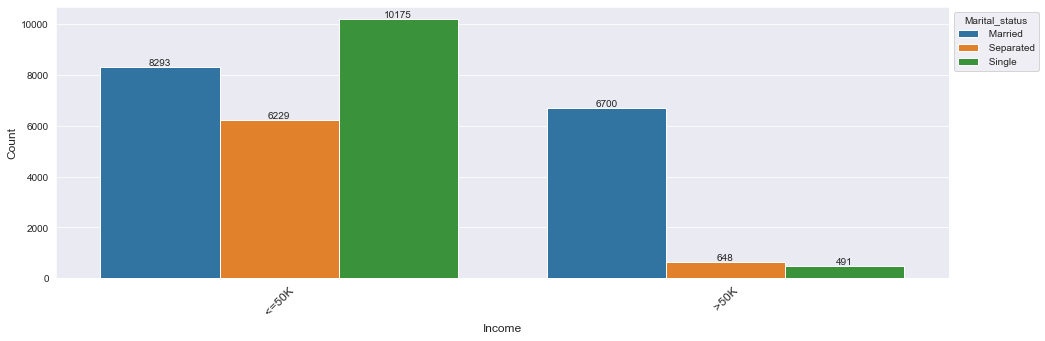

In [252]:
for item in data1_cat[['Workclass','Education','Education_num','Occupation','Race','Income']].columns:
    plt.figure(figsize=(16,5))
    ax = sns.countplot(x=item,hue='Marital_status',data=data0)
    sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
    ax.bar_label(ax.containers[0]);
    ax.bar_label(ax.containers[1]);
    ax.bar_label(ax.containers[2]);
    plt.xticks(fontsize = 12, rotation=45)
    plt.ylabel(ylabel = 'Count', fontsize = 12)
    plt.xlabel(xlabel = item, fontsize = 12)
    plt.show()

### Observation:
1. The above graphs show, how other categorical features are distributed based on Marital status

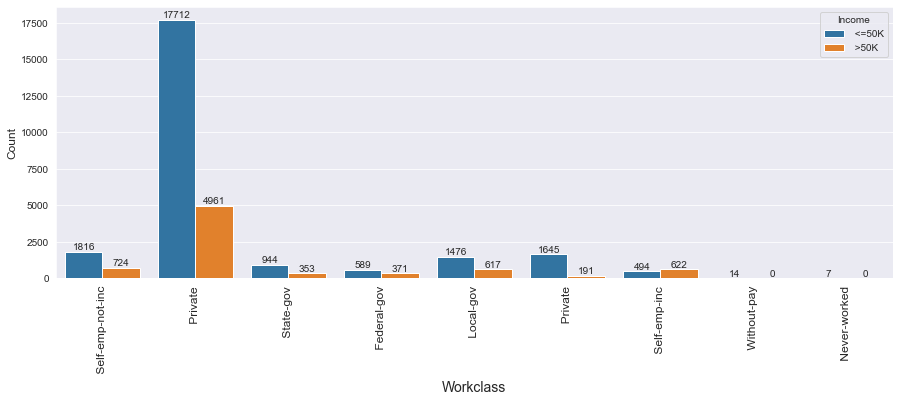

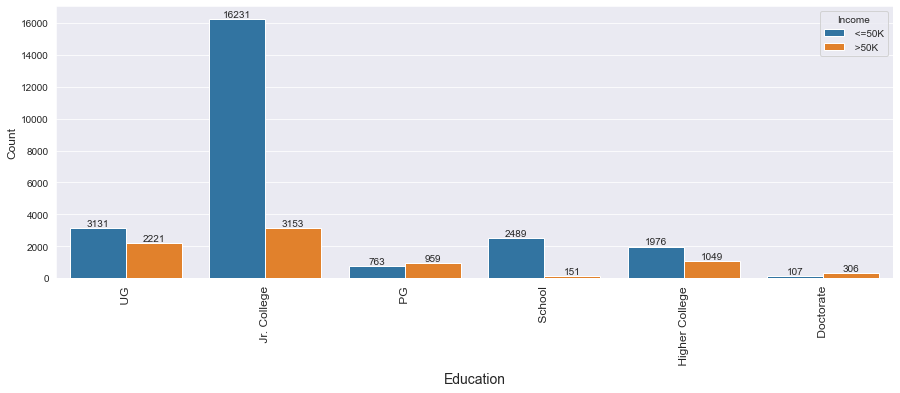

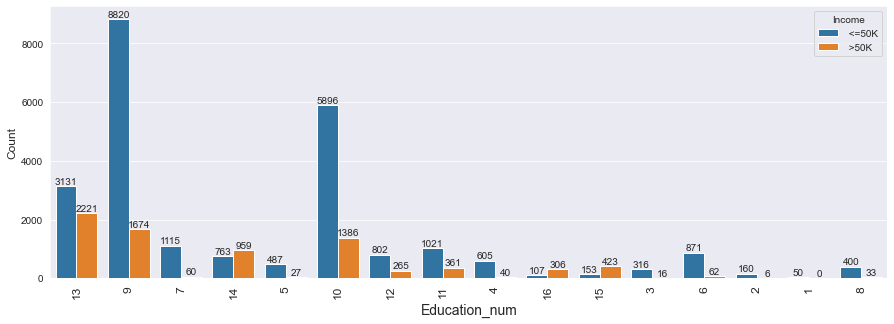

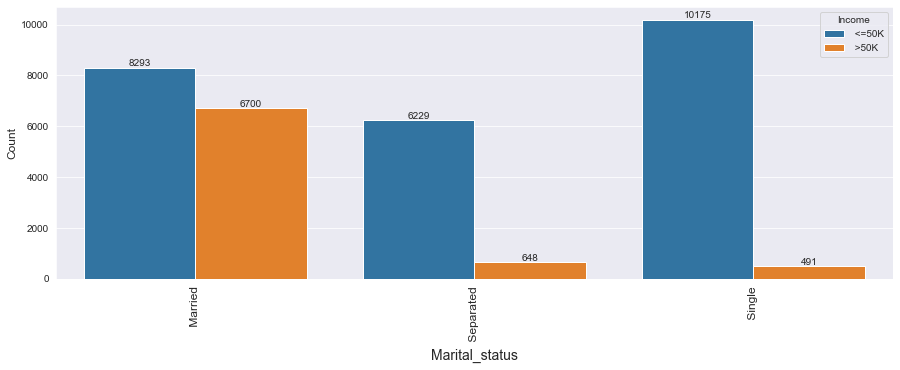

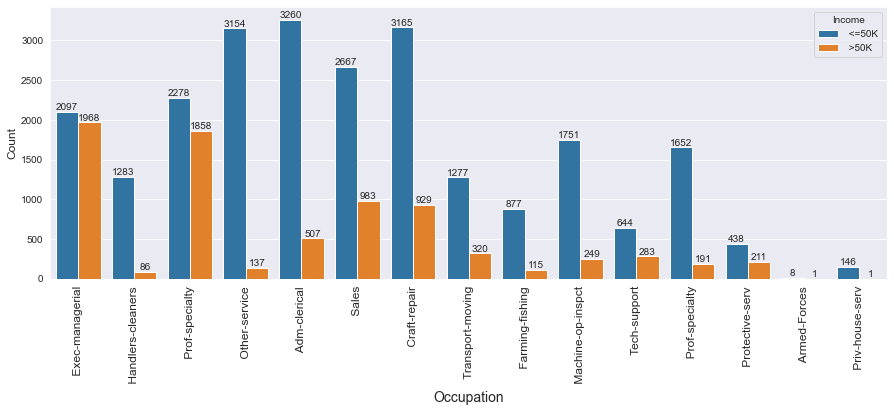

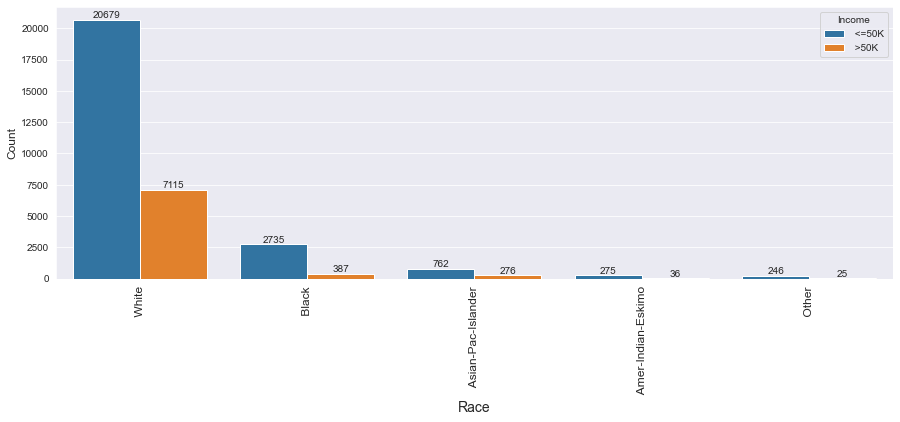

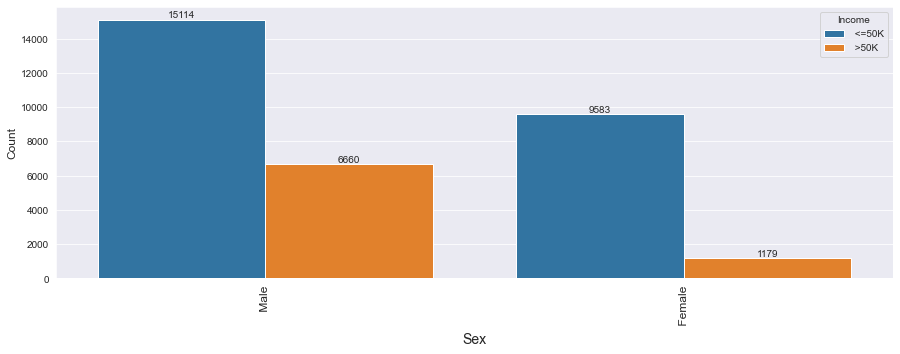

In [268]:
for column in ['Workclass','Education','Education_num','Marital_status','Occupation','Race','Sex']:
    plt.figure(figsize=(15,5))
    ax = sns.countplot(x=column,hue='Income',data=data0)
    ax.bar_label(ax.containers[0])
    ax.bar_label(ax.containers[1])
    plt.xticks(fontsize = 12, rotation=90)
    plt.ylabel(ylabel = 'Count', fontsize = 12)
    plt.xlabel(xlabel = column, fontsize = 14)
    plt.show()
    print(' ')

### Observation:
1. The above graphs show, how other categorical features are distributed based on income category.

 
Income count based on Age


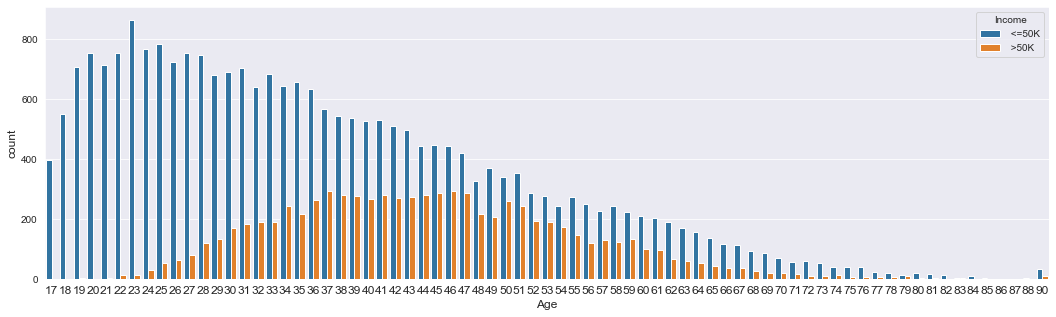

In [256]:
plt.figure(figsize=(18,5))
print(' ')
print('Income count based on Age')
sns.countplot(x='Age', hue='Income',data=data0)
plt.xticks(fontsize = 12, rotation=0)
plt.ylabel(ylabel = 'count', fontsize = 12)
plt.xlabel(xlabel = 'Age', fontsize = 12)
plt.show()

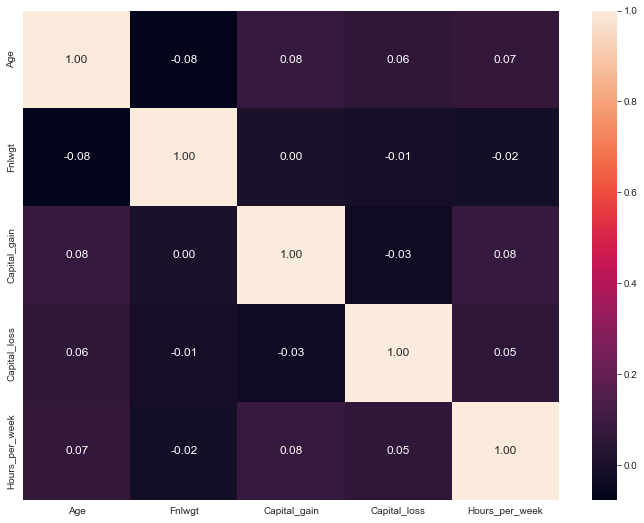

In [255]:
plt.figure(figsize=(12,9))
sns.heatmap(data1_num.corr(),annot=True, fmt = ".2f", annot_kws={'size':12});
plt.show()

### Observation:
1.The heat map shows there are some independant features whic shows multicollinearity with each other. 

In [296]:
data2 = data1.drop('Relationship', axis=1)
data2

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,UG,13,Married,Exec-managerial,White,Male,0,0,13,United-States,0
1,38,Private,215646,Jr. College,9,Separated,Handlers-cleaners,White,Male,0,0,40,United-States,0
2,53,Private,234721,Jr. College,7,Married,Handlers-cleaners,Black,Male,0,0,40,United-States,0
3,28,Private,338409,UG,13,Married,Prof-specialty,Black,Female,0,0,40,Cuba,0
4,37,Private,284582,PG,14,Married,Exec-managerial,White,Female,0,0,40,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32531,27,Private,257302,Higher College,12,Married,Tech-support,White,Female,0,0,38,United-States,0
32532,40,Private,154374,Jr. College,9,Married,Machine-op-inspct,White,Male,0,0,40,United-States,1
32533,58,Private,151910,Jr. College,9,Separated,Adm-clerical,White,Female,0,0,40,United-States,0
32534,22,Private,201490,Jr. College,9,Single,Adm-clerical,White,Male,0,0,20,United-States,0


In [298]:
data2['Income'] = data2['Income'].astype(int)

In [302]:
pd.set_option('max_columns', None)
data3 = pd.get_dummies(data2, drop_first = True)
data3

,Age,Fnlwgt,Capital_gain,Capital_loss,Hours_per_week,Income,Workclass_ Federal-gov,Workclass_ Local-gov,Workclass_ Never-worked,Workclass_ Private,Workclass_ Self-emp-inc,Workclass_ Self-emp-not-inc,Workclass_ State-gov,Workclass_ Without-pay,Education_ Higher College,Education_ Jr. College,Education_ PG,Education_ School,Education_ UG,Education_num_10,Education_num_11,Education_num_12,Education_num_13,Education_num_14,Education_num_15,Education_num_16,Education_num_2,Education_num_3,Education_num_4,Education_num_5,Education_num_6,Education_num_7,Education_num_8,Education_num_9,Marital_status_ Separated,Marital_status_ Single,Occupation_ Adm-clerical,Occupation_ Armed-Forces,Occupation_ Craft-repair,Occupation_ Exec-managerial,Occupation_ Farming-fishing,Occupation_ Handlers-cleaners,Occupation_ Machine-op-inspct,Occupation_ Other-service,Occupation_ Priv-house-serv,Occupation_ Prof-specialty,Occupation_ Protective-serv,Occupation_ Sales,Occupation_ Tech-support,Occupation_ Transport-moving,Race_ Asian-Pac-Islander,Race_ Black,Race_ Other,Race_ White,Sex_ Male,Native_country_ Cambodia,Native_country_ Canada,Native_country_ China,Native_country_ Columbia,Native_country_ Cuba,Native_country_ Dominican-Republic,Native_country_ Ecuador,Native_country_ El-Salvador,Native_country_ England,Native_country_ France,Native_country_ Germany,Native_country_ Greece,Native_country_ Guatemala,Native_country_ Haiti,Native_country_ Holand-Netherlands,Native_country_ Honduras,Native_country_ Hong,Native_country_ Hungary,Native_country_ India,Native_country_ Iran,Native_country_ Ireland,Native_country_ Italy,Native_country_ Jamaica,Native_country_ Japan,Native_country_ Laos,Native_country_ Mexico,Native_country_ Nicaragua,Native_country_ Outlying-US(Guam-USVI-etc),Native_country_ Peru,Native_country_ Philippines,Native_country_ Poland,Native_country_ Portugal,Native_country_ Puerto-Rico,Native_country_ Scotland,Native_country_ South,Native_country_ Taiwan,Native_country_ Thailand,Native_country_ Trinadad&Tobago,Native_country_ United-States,Native_country_ Vietnam,Native_country_ Yugoslavia
0,50,83311,0,0,13,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,38,215646,0,0,40,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,53,234721,0,0,40,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,28,338409,0,0,40,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,37,284582,0,0,40,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32531,27,257302,0,0,38,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
32532,40,154374,0,0,40,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
32533,58,151910,0,0,40,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0

In [304]:
data3.isna().sum().sum()

0

In [355]:
data4 = data3.copy()

In [356]:
# creating a function to remove outliers using standard deviation method...
def get_outliers_std(data):
    
    #empty list to store index values
    all_indices = []
    
    for column in data.columns:
        data_mean, data_std = np.mean(data[column]), np.std(data[column])
        cut_off = data_std * 3
        lower, upper = data_mean - cut_off, data_mean + cut_off

        index = np.where((data[column] < lower) | (data [column] > upper))

        all_indices.extend(index[0])
    
    set_res = set(all_indices)
    indices_to_remove = np.array(list(set_res))
#     print(indices_to_remove)
    return indices_to_remove #returns list of indices to remove outliers

# data.drop(data.index[indices_to_remove])



#  creating a function to remove outliers using inter quantile range...
def get_outliers_iqr(data):
    
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3-q1
    
    #empty list to store index values
    all_indices = []
    
    for column in data.columns:
#         data_mean, data_std = np.mean(data[column]), np.std(data[column])
#         cut_off = data_std * 3
        lower, upper = (q1[column] - (1.5*iqr[column])) , (q3[column] + (1.5*iqr[column]))

        index = np.where((data[column] < lower) | (data [column] > upper))

        all_indices.extend(index[0])
    
    set_res = set(all_indices)
    indices_to_remove = np.array(list(set_res))
#     print(indices_to_remove)
    return indices_to_remove#data.drop(data.index[indices_to_remove]) #returns the data with removed outliers

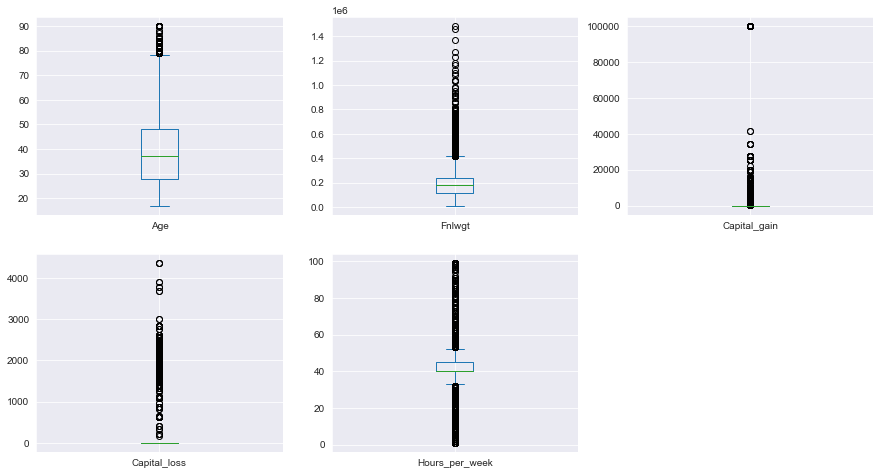

In [357]:
data4[num_cols].plot(kind = 'box', figsize=(15,8), layout=(2,3), sharex=False, subplots=True);

## Using Z score method..

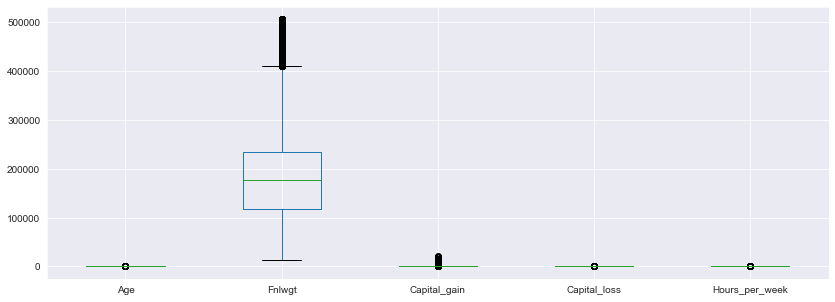

Total Data loss after removing Outliers :  7.78


In [358]:
data_out = data4[num_cols]
to_remove_std = get_outliers_std(data_out)
data_out = data_out.drop(data_out.index[to_remove_std])
data4_std = data4.drop(data4.index[to_remove_std])


data_out.iloc[:,:].boxplot(figsize = (14,6))
plt.subplots_adjust(bottom=0.25)
plt.show()


total_data_loss = (data3.shape[0] - data4_std.shape[0])*100/data3.shape[0]
print('Total Data loss after removing Outliers : ', round(total_data_loss,2))

## Using IQR Method to remove outliers..

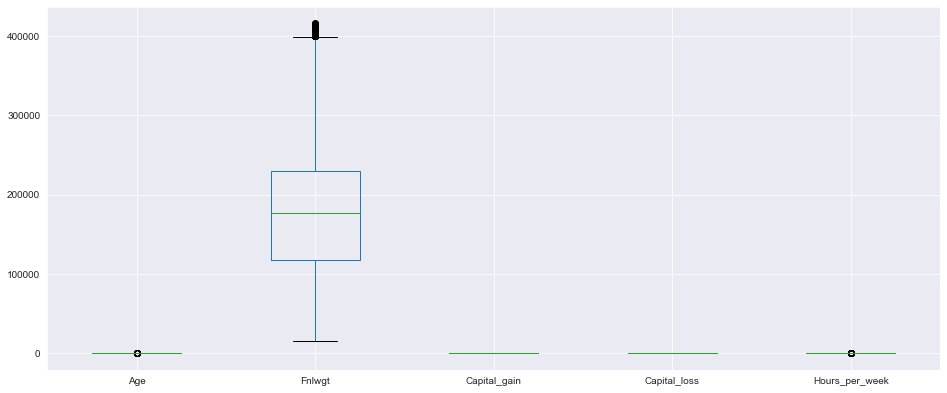

Total Data loss after removing Outliers :  39.43


In [359]:
data_out = data4[num_cols]
to_remove_iqr = get_outliers_iqr(data_out)
data_out = data_out.drop(data_out.index[to_remove_iqr])
data4_iqr = data4.drop(data4.index[to_remove_iqr])


data_out.iloc[:,:].boxplot(figsize = (16,8))
plt.subplots_adjust(bottom=0.25)
plt.show()


total_data_loss = (data3.shape[0] - data4_iqr.shape[0])*100/data3.shape[0]
print('Total Data loss after removing Outliers : ', round(total_data_loss,2))

In [360]:
data5 = data4_std.copy()
# data5
data5.reset_index(drop=True, inplace=True)
data5

,Age,Fnlwgt,Capital_gain,Capital_loss,Hours_per_week,Income,Workclass_ Federal-gov,Workclass_ Local-gov,Workclass_ Never-worked,Workclass_ Private,Workclass_ Self-emp-inc,Workclass_ Self-emp-not-inc,Workclass_ State-gov,Workclass_ Without-pay,Education_ Higher College,Education_ Jr. College,Education_ PG,Education_ School,Education_ UG,Education_num_10,Education_num_11,Education_num_12,Education_num_13,Education_num_14,Education_num_15,Education_num_16,Education_num_2,Education_num_3,Education_num_4,Education_num_5,Education_num_6,Education_num_7,Education_num_8,Education_num_9,Marital_status_ Separated,Marital_status_ Single,Occupation_ Adm-clerical,Occupation_ Armed-Forces,Occupation_ Craft-repair,Occupation_ Exec-managerial,Occupation_ Farming-fishing,Occupation_ Handlers-cleaners,Occupation_ Machine-op-inspct,Occupation_ Other-service,Occupation_ Priv-house-serv,Occupation_ Prof-specialty,Occupation_ Protective-serv,Occupation_ Sales,Occupation_ Tech-support,Occupation_ Transport-moving,Race_ Asian-Pac-Islander,Race_ Black,Race_ Other,Race_ White,Sex_ Male,Native_country_ Cambodia,Native_country_ Canada,Native_country_ China,Native_country_ Columbia,Native_country_ Cuba,Native_country_ Dominican-Republic,Native_country_ Ecuador,Native_country_ El-Salvador,Native_country_ England,Native_country_ France,Native_country_ Germany,Native_country_ Greece,Native_country_ Guatemala,Native_country_ Haiti,Native_country_ Holand-Netherlands,Native_country_ Honduras,Native_country_ Hong,Native_country_ Hungary,Native_country_ India,Native_country_ Iran,Native_country_ Ireland,Native_country_ Italy,Native_country_ Jamaica,Native_country_ Japan,Native_country_ Laos,Native_country_ Mexico,Native_country_ Nicaragua,Native_country_ Outlying-US(Guam-USVI-etc),Native_country_ Peru,Native_country_ Philippines,Native_country_ Poland,Native_country_ Portugal,Native_country_ Puerto-Rico,Native_country_ Scotland,Native_country_ South,Native_country_ Taiwan,Native_country_ Thailand,Native_country_ Trinadad&Tobago,Native_country_ United-States,Native_country_ Vietnam,Native_country_ Yugoslavia
0,50,83311,0,0,13,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,38,215646,0,0,40,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,53,234721,0,0,40,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,28,338409,0,0,40,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,37,284582,0,0,40,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30001,27,257302,0,0,38,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
30002,40,154374,0,0,40,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
30003,58,151910,0,0,40,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0

In [361]:
data5.describe()

,Age,Fnlwgt,Capital_gain,Capital_loss,Hours_per_week,Income,Workclass_ Federal-gov,Workclass_ Local-gov,Workclass_ Never-worked,Workclass_ Private,Workclass_ Self-emp-inc,Workclass_ Self-emp-not-inc,Workclass_ State-gov,Workclass_ Without-pay,Education_ Higher College,Education_ Jr. College,Education_ PG,Education_ School,Education_ UG,Education_num_10,Education_num_11,Education_num_12,Education_num_13,Education_num_14,Education_num_15,Education_num_16,Education_num_2,Education_num_3,Education_num_4,Education_num_5,Education_num_6,Education_num_7,Education_num_8,Education_num_9,Marital_status_ Separated,Marital_status_ Single,Occupation_ Adm-clerical,Occupation_ Armed-Forces,Occupation_ Craft-repair,Occupation_ Exec-managerial,Occupation_ Farming-fishing,Occupation_ Handlers-cleaners,Occupation_ Machine-op-inspct,Occupation_ Other-service,Occupation_ Priv-house-serv,Occupation_ Prof-specialty,Occupation_ Protective-serv,Occupation_ Sales,Occupation_ Tech-support,Occupation_ Transport-moving,Race_ Asian-Pac-Islander,Race_ Black,Race_ Other,Race_ White,Sex_ Male,Native_country_ Cambodia,Native_country_ Canada,Native_country_ China,Native_country_ Columbia,Native_country_ Cuba,Native_country_ Dominican-Republic,Native_country_ Ecuador,Native_country_ El-Salvador,Native_country_ England,Native_country_ France,Native_country_ Germany,Native_country_ Greece,Native_country_ Guatemala,Native_country_ Haiti,Native_country_ Holand-Netherlands,Native_country_ Honduras,Native_country_ Hong,Native_country_ Hungary,Native_country_ India,Native_country_ Iran,Native_country_ Ireland,Native_country_ Italy,Native_country_ Jamaica,Native_country_ Japan,Native_country_ Laos,Native_country_ Mexico,Native_country_ Nicaragua,Native_country_ Outlying-US(Guam-USVI-etc),Native_country_ Peru,Native_country_ Philippines,Native_country_ Poland,Native_country_ Portugal,Native_country_ Puerto-Rico,Native_country_ Scotland,Native_country_ South,Native_country_ Taiwan,Native_country_ Thailand,Native_country_ Trinadad&Tobago,Native_country_ United-States,Native_country_ Vietnam,Native_country_ Yugoslavia
count,30006.000000,30006.000000,30006.000000,30006.000000,30006.000000,30006.000000,30006.000000,30006.000000,30006.000000,30006.000000,30006.000000,30006.000000,30006.000000,30006.000000,30006.000000,30006.000000,30006.000000,30006.000000,30006.000000,30006.000000,30006.000000,30006.000000,30006.000000,30006.000000,30006.000000,30006.000000,30006.000000,30006.000000,30006.000000,30006.000000,30006.000000,30006.000000,30006.000000,30006.000000,30006.000000,30006.000000,30006.000000,30006.000000,30006.000000,30006.000000,30006.000000,30006.000000,30006.000000,30006.000000,30006.000000,30006.000000,30006.000000,30006.000000,30006.000000,30006.000000,30006.000000,30006.000000,30006.000000,30006.000000,30006.000000,30006.000000,30006.000000,30006.000000,30006.000000,30006.000000,30006.000000,30006.000000,30006.000000,30006.000000,30006.000000,30006.000000,30006.000000,30006.000000,30006.000000,30006.0,30006.000000,30006.000000,30006.000000,30006.000000,30006.000000,30006.000000,30006.000000,30006.000000,30006.000000,30006.000000,30006.000000,30006.000000,30006.000000,30006.000000,30006.000000,30006.000000,30006.000000,30006.000000,30006.000000,30006.000000,30006.000000,30006.000000,30006.000000,30006.000000,30006.000000,30006.000000
mean,38.191962,185481.417117,567.617143,1.202193,39.884190,0.221856,0.029494,0.064087,0.000233,0.704159,0.031327,0.074019,0.040559,0.000467,0.090482,0.605212,0.049790,0.081817,0.161734,0.227588,0.043191,0.032893,0.161734,0.049790,0.014397,0.010964,0.005066,0.010298,0.019629,0.016363,0.028928,0.037326,0.013697,0.326601,0.213824,0.336733,0.119309,0.000267,0.127008,0.120709,0.029194,0.043425,0.063454,0.104479,0.004632,0.122276,0.019963,0.111978,0.028494,0.048924,0.031760,0.096281,0.008598,0.853396,0.661334,0.000567,0.003666,0.002233,0.001866,0.002999,0.002233,0.000900,0.003233,0.002766,0.000933,0.004332,0.000833,0.001933,0.001400,0.0,0.00

In [362]:
data5[num_cols].skew()

Age                0.489089
Fnlwgt             0.634650
Capital_gain       4.955914
Capital_loss      29.750401
Hours_per_week    -0.349780
dtype: float64

In [363]:
for col in ['Fnlwgt', 'Capital_gain', 'Capital_loss']:
    data5[col] = np.sqrt(data5[col])
    data5[col] = np.cbrt(data5[col])
    data5[col] = np.log1p(data5[col])

In [364]:
data5[num_cols].skew()

Age                0.489089
Fnlwgt            -0.915451
Capital_gain       3.102504
Capital_loss      25.028869
Hours_per_week    -0.349780
dtype: float64

In [365]:
x = data5[num_cols]

from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson', standardize=True)

x_pt = pt.fit_transform(x)
x_pt = pd.DataFrame(x_pt, columns = x.columns)

for col in num_cols:
    data5[col]=x_pt[col]
    
    
data5[num_cols].skew()

Age               -0.017314
Fnlwgt            -0.038876
Capital_gain       3.081061
Capital_loss      24.943713
Hours_per_week     0.108420
dtype: float64

In [366]:
data5.isna().sum().sum()

0

In [368]:
data6 = data5.drop(['Capital_gain', 'Capital_loss'], axis=1)
data6.reset_index(drop=True, inplace=True)
data6

,Age,Fnlwgt,Hours_per_week,Income,Workclass_ Federal-gov,Workclass_ Local-gov,Workclass_ Never-worked,Workclass_ Private,Workclass_ Self-emp-inc,Workclass_ Self-emp-not-inc,Workclass_ State-gov,Workclass_ Without-pay,Education_ Higher College,Education_ Jr. College,Education_ PG,Education_ School,Education_ UG,Education_num_10,Education_num_11,Education_num_12,Education_num_13,Education_num_14,Education_num_15,Education_num_16,Education_num_2,Education_num_3,Education_num_4,Education_num_5,Education_num_6,Education_num_7,Education_num_8,Education_num_9,Marital_status_ Separated,Marital_status_ Single,Occupation_ Adm-clerical,Occupation_ Armed-Forces,Occupation_ Craft-repair,Occupation_ Exec-managerial,Occupation_ Farming-fishing,Occupation_ Handlers-cleaners,Occupation_ Machine-op-inspct,Occupation_ Other-service,Occupation_ Priv-house-serv,Occupation_ Prof-specialty,Occupation_ Protective-serv,Occupation_ Sales,Occupation_ Tech-support,Occupation_ Transport-moving,Race_ Asian-Pac-Islander,Race_ Black,Race_ Other,Race_ White,Sex_ Male,Native_country_ Cambodia,Native_country_ Canada,Native_country_ China,Native_country_ Columbia,Native_country_ Cuba,Native_country_ Dominican-Republic,Native_country_ Ecuador,Native_country_ El-Salvador,Native_country_ England,Native_country_ France,Native_country_ Germany,Native_country_ Greece,Native_country_ Guatemala,Native_country_ Haiti,Native_country_ Holand-Netherlands,Native_country_ Honduras,Native_country_ Hong,Native_country_ Hungary,Native_country_ India,Native_country_ Iran,Native_country_ Ireland,Native_country_ Italy,Native_country_ Jamaica,Native_country_ Japan,Native_country_ Laos,Native_country_ Mexico,Native_country_ Nicaragua,Native_country_ Outlying-US(Guam-USVI-etc),Native_country_ Peru,Native_country_ Philippines,Native_country_ Poland,Native_country_ Portugal,Native_country_ Puerto-Rico,Native_country_ Scotland,Native_country_ South,Native_country_ Taiwan,Native_country_ Thailand,Native_country_ Trinadad&Tobago,Native_country_ United-States,Native_country_ Vietnam,Native_country_ Yugoslavia
0,0.924401,-1.118479,-2.216862,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0.126509,0.423821,-0.034958,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,1.099341,0.603622,-0.034958,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,-0.711882,1.479818,-0.034958,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0.051237,1.043730,-0.034958,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30001,-0.808314,0.807870,-0.217888,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
30002,0.272405,-0.210684,-0.034958,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
30003,1.373877,-0.238439,-0.034958,0,0,0,0

In [369]:
df_feat = data6.drop('Income', axis=1)
df_tgt = data6['Income']

In [371]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["variables"] = df_feat[['Age', 'Fnlwgt','Hours_per_week']].columns
vif["VIF"] = [variance_inflation_factor(df_feat[['Age', 'Fnlwgt','Hours_per_week']].values, i) for i in range(df_feat[['Age', 'Fnlwgt','Hours_per_week']].shape[1])]
vif.sort_values(by = 'VIF', ascending = False)

,variables,VIF
0,Age,1.026172
2,Hours_per_week,1.022048
1,Fnlwgt,1.004486


### Observation:
1. We can see that multicollinerity is within permissible limit of 10.

## Dealing with Imbalenced label class

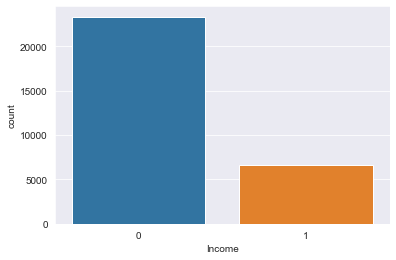

Counter({0: 23349, 1: 6657})

In [372]:
from collections import Counter
sns.countplot(x=df_tgt)
plt.show()
Counter(df_tgt)

In [373]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X, y_class = oversample.fit_resample(df_feat, df_tgt)

In [374]:
y_class.value_counts()

0    23349
1    23349
Name: Income, dtype: int64

## Selecting maximum features which show more than 90% of the variation in attrition label using PCA

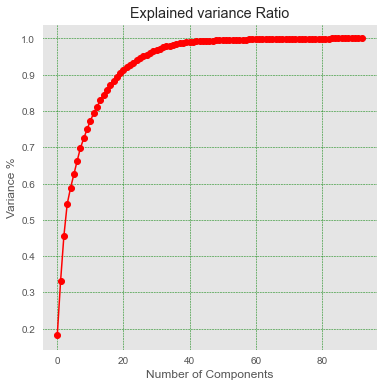

In [375]:
plt.style.use('ggplot')
from sklearn.decomposition import PCA
pca = PCA()
#plot the graph to find the principal components
x_pca = pca.fit_transform(X)
plt.figure(figsize=(6,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.xlabel('Number of Components')
plt.ylabel('Variance %')
plt.title('Explained variance Ratio')
plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)

### Observation:
1. From above graph we see 21 of the features are enough to understand the more than 90% of the variation in Attrition label.

In [376]:
x_new = PCA(n_components=21)
X = pd.DataFrame(x_new.fit_transform(X))

<h2 align="center"><font color = "red">Model Selection</font> </h2>

In [377]:
## TO PLOT CONFUSION MATRIX
def confusion_matrix_c(y_test,y_pred):
    cm = confusion_matrix(y_test, y_pred)
    print("====================")
    print('Confusion Matrix :\n')
    print(cm)
    print("====================")
    
    
## TO PLOT ROC_AUC CURVE
def plot_roc_auc_curve(fpr, tpr):
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange',
             lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()
    


# TO print classification report, confusion matrx, roc-auc curve
def print_score(clf,x_train, x_test, y_train, y_test, train=True):
    if train:
        y_pred = clf.predict(x_train)
        print(f"Accuracy score for Train : {accuracy_score(y_train,y_pred) * 100:.2f}%")
        return round(accuracy_score(y_train,y_pred)*100,2)
#         print('\n \n Train Classification report \n', classification_report(y_train,y_pred, digits=2))
              
    elif train==False:
        y_pred = clf.predict(x_test)
        acc = round(accuracy_score(y_test,y_pred)*100,2)
        print(f"Accuracy score for Test : {accuracy_score(y_test,y_pred) * 100:.2f}%")
        confusion_matrix_c(y_test, y_pred)
        print('\n \n Test Classification report \n', classification_report(y_test, y_pred, digits=2))
        
        diff = []
        best_cv = []
        for j in range(3, 12):
            cv_score = round(cross_val_score(clf, X, y_class, cv=j, scoring="accuracy").mean()*100,2)
            diff.append(abs(cv_score - acc))
            best_cv.append(j)
        k_f = best_cv[diff.index(min(diff))]
        cv_score = cross_val_score(clf,X, y_class, cv=k_f, scoring="accuracy").mean()
        print(f"Cross Validation score at best cv={k_f} is : {cv_score*100:.2f}%")
        y_predict_probabilities = clf.predict_proba(x_test)[:,1]
        fpr, tpr, _ = roc_curve(y_test, y_predict_probabilities)
        roc_auc = auc(fpr, tpr)
        plot_roc_auc_curve(fpr, tpr)
        return acc,k_f, min(diff),cv_score*100

In [379]:
dtc = DecisionTreeClassifier()
etc = ExtraTreesClassifier()
# gnb = GaussianNB()
knc = KNeighborsClassifier()
lgr = LogisticRegression()
rfc = RandomForestClassifier()
# gbc = GradientBoostingClassifier()

::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
 
 
for DecisionTreeClassifier model..
 
Best Random_state number for splitting the data is:  130
 
Accuracy score for Train : 99.99%
Accuracy score for Test : 83.07%
Confusion Matrix :

[[4748 1080]
 [ 896 4951]]

 
 Test Classification report 
               precision    recall  f1-score   support

           0       0.84      0.81      0.83      5828
           1       0.82      0.85      0.83      5847

    accuracy                           0.83     11675
   macro avg       0.83      0.83      0.83     11675
weighted avg       0.83      0.83      0.83     11675

Cross Validation score at best cv=11 is : 83.23%


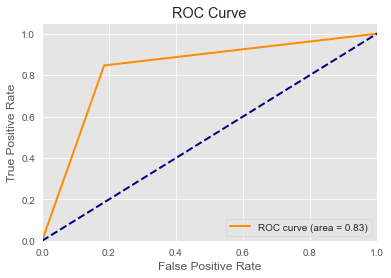

::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
 
 
for ExtraTreesClassifier model..
 
Best Random_state number for splitting the data is:  130
 
Accuracy score for Train : 99.99%
Accuracy score for Test : 88.47%
Confusion Matrix :

[[5018  810]
 [ 536 5311]]

 
 Test Classification report 
               precision    recall  f1-score   support

           0       0.90      0.86      0.88      5828
           1       0.87      0.91      0.89      5847

    accuracy                           0.88     11675
   macro avg       0.89      0.88      0.88     11675
weighted avg       0.89      0.88      0.88     11675

Cross Validation score at best cv=10 is : 88.51%


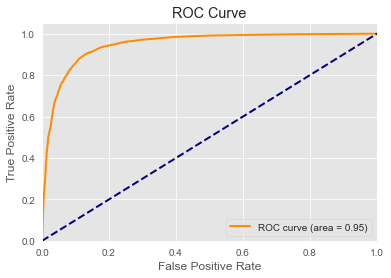

::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
 
 
for KNeighborsClassifier model..
 
Best Random_state number for splitting the data is:  75
 
Accuracy score for Train : 88.91%
Accuracy score for Test : 85.34%
Confusion Matrix :

[[4519 1339]
 [ 373 5444]]

 
 Test Classification report 
               precision    recall  f1-score   support

           0       0.92      0.77      0.84      5858
           1       0.80      0.94      0.86      5817

    accuracy                           0.85     11675
   macro avg       0.86      0.85      0.85     11675
weighted avg       0.86      0.85      0.85     11675

Cross Validation score at best cv=11 is : 85.36%


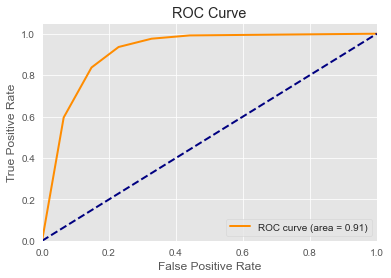

::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
 
 
for LogisticRegression model..
 
Best Random_state number for splitting the data is:  47
 
Accuracy score for Train : 82.60%
Accuracy score for Test : 82.61%
Confusion Matrix :

[[4570 1210]
 [ 820 5075]]

 
 Test Classification report 
               precision    recall  f1-score   support

           0       0.85      0.79      0.82      5780
           1       0.81      0.86      0.83      5895

    accuracy                           0.83     11675
   macro avg       0.83      0.83      0.83     11675
weighted avg       0.83      0.83      0.83     11675

Cross Validation score at best cv=8 is : 82.61%


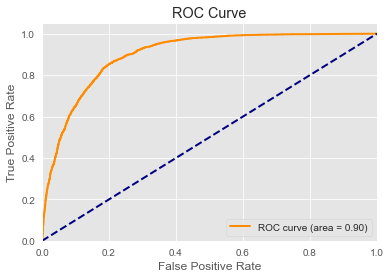

::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
 
 
for RandomForestClassifier model..
 
Best Random_state number for splitting the data is:  103
 
Accuracy score for Train : 99.99%
Accuracy score for Test : 88.09%
Confusion Matrix :

[[4998  868]
 [ 522 5287]]

 
 Test Classification report 
               precision    recall  f1-score   support

           0       0.91      0.85      0.88      5866
           1       0.86      0.91      0.88      5809

    accuracy                           0.88     11675
   macro avg       0.88      0.88      0.88     11675
weighted avg       0.88      0.88      0.88     11675

Cross Validation score at best cv=7 is : 88.13%


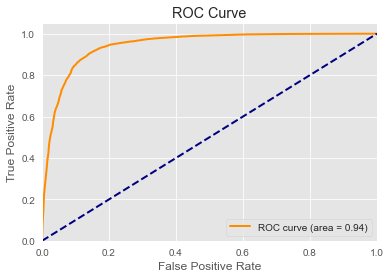

,algo,best random state,train_accuracy,test_accuracy,Score_diff,best cv fold,cross_val_score
3,LogisticRegression,47,82.60,82.61,0.00,8,82.609664
1,ExtraTreesClassifier,130,99.99,88.47,0.00,10,88.513522
2,KNeighborsClassifier,75,88.91,85.34,0.02,11,85.359253
0,DecisionTreeClassifier,130,99.99,83.07,0.03,11,83.228693
4,RandomForestClassifier,103,99.99,88.09,0.03,7,88.130216


In [380]:
algo = [] #list to save ML algorithm name
rs = []
cv_fold = []
#lists to store evaluation metrics data for train set
train_accuracy = [] 

#lists to store evaluation metrics data for test set
test_accuracy = []

crossvalscore = []
score_diff = []


models = [dtc,etc,knc,lgr,rfc]
models_name = ['DecisionTreeClassifier','ExtraTreesClassifier','KNeighborsClassifier','LogisticRegression','RandomForestClassifier']
dummy_count = 0 #dummy variable for count purpose
for model in models:
    diff = []
    randomstate = []
    for i in range(0, 150):  ### loop to find best random state for splitting
        x_train, x_test, y_train, y_test = train_test_split(X, y_class, test_size = 0.25, random_state = i)
        model.fit(x_train, y_train)
        pred_train = model.predict(x_train)
        pred_test = model.predict(x_test)
        diff.append(abs(accuracy_score(y_train, pred_train) - accuracy_score(y_test, pred_test)))
        randomstate.append(i)
        
    best_i = randomstate[diff.index(min(diff))]
    rs.append(best_i)
    print('::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::')
    print(' ')
    print(' ')
    print('for '+ models_name[dummy_count] + ' model..')
    print(' ')
    print("Best Random_state number for splitting the data is: ", best_i)
    print(' ')
    
    ### splitting with best random state
    x_train, x_test, y_train, y_test = train_test_split(X, y_class, random_state=best_i, test_size=.25)
    
    
    ### training the model
    model.fit(x_train, y_train)
    algo.append(models_name[dummy_count])
    tr_ac = print_score(model, x_train, x_test, y_train, y_test, train=True)
    train_accuracy.append(tr_ac)
    test_ac, k_f, sc_diff, cvs = print_score(model, x_train, x_test, y_train, y_test, train=False)
    cv_fold.append(k_f)
    score_diff.append(sc_diff)
    test_accuracy.append(test_ac)
    crossvalscore.append(cvs)
#     print(cv_fold)
#     print(score_diff)
    dummy_count+=1

    
### dataframe to make list of all the ML algorithms & their evaluation metrics
table = pd.DataFrame(list(zip(algo, rs, train_accuracy, test_accuracy, score_diff, cv_fold, crossvalscore)),
                              columns =['algo', 'best random state', 'train_accuracy', 'test_accuracy', 'Score_diff','best cv fold', 'cross_val_score'])


### display dataframe & sort based on TEST MAE score.
table.sort_values(by=['Score_diff', 'test_accuracy', 'cross_val_score' ])

#### Observation
We will select ExtraTreesClassifier model as it has,
1. minimum difference in Cross val & test accuracies
2. Maximum Test accuracy amongst all other classifiaction models.

<h1 align = "center"><font color = "red"><b> Hyper paramter tuning using GridSearchCV </b></font></h1>

In [381]:
x_train, x_test, y_train, y_test = train_test_split(X, y_class, test_size = 0.25, random_state = 130)

In [382]:
param_grid_etc = {'n_estimators':[100,200,300,400],
                  'criterion':["gini", "entropy"],
                  'max_depth':[2, 3,4],
                  'min_samples_split':[2,3,4],
                 }

In [383]:
etc_tune = ExtraTreesClassifier()

In [386]:
etc_grid = GridSearchCV(estimator = etc_tune,
                       param_grid = param_grid_etc,
                       verbose = 2,
                       scoring = 'accuracy')

In [387]:
etc_grid.fit(x_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV] END criterion=gini, max_depth=2, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END criterion=gini, max_depth=2, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END criterion=gini, max_depth=2, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END criterion=gini, max_depth=2, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END criterion=gini, max_depth=2, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END criterion=gini, max_depth=2, min_samples_split=2, n_estimators=200; total time=   0.7s
[CV] END criterion=gini, max_depth=2, min_samples_split=2, n_estimators=200; total time=   0.7s
[CV] END criterion=gini, max_depth=2, min_samples_split=2, n_estimators=200; total time=   0.7s
[CV] END criterion=gini, max_depth=2, min_samples_split=2, n_estimators=200; total time=   0.7s
[CV] END criterion=gini, max_depth=2, min_samples_split=2, n_estimators=20

[CV] END criterion=gini, max_depth=3, min_samples_split=3, n_estimators=200; total time=   0.9s
[CV] END criterion=gini, max_depth=3, min_samples_split=3, n_estimators=200; total time=   0.8s
[CV] END criterion=gini, max_depth=3, min_samples_split=3, n_estimators=200; total time=   0.8s
[CV] END criterion=gini, max_depth=3, min_samples_split=3, n_estimators=200; total time=   0.8s
[CV] END criterion=gini, max_depth=3, min_samples_split=3, n_estimators=200; total time=   0.8s
[CV] END criterion=gini, max_depth=3, min_samples_split=3, n_estimators=300; total time=   1.3s
[CV] END criterion=gini, max_depth=3, min_samples_split=3, n_estimators=300; total time=   1.3s
[CV] END criterion=gini, max_depth=3, min_samples_split=3, n_estimators=300; total time=   1.3s
[CV] END criterion=gini, max_depth=3, min_samples_split=3, n_estimators=300; total time=   1.3s
[CV] END criterion=gini, max_depth=3, min_samples_split=3, n_estimators=300; total time=   1.3s
[CV] END criterion=gini, max_depth=3, mi

[CV] END criterion=gini, max_depth=4, min_samples_split=4, n_estimators=300; total time=   1.6s
[CV] END criterion=gini, max_depth=4, min_samples_split=4, n_estimators=300; total time=   1.5s
[CV] END criterion=gini, max_depth=4, min_samples_split=4, n_estimators=300; total time=   1.5s
[CV] END criterion=gini, max_depth=4, min_samples_split=4, n_estimators=300; total time=   1.5s
[CV] END criterion=gini, max_depth=4, min_samples_split=4, n_estimators=400; total time=   2.1s
[CV] END criterion=gini, max_depth=4, min_samples_split=4, n_estimators=400; total time=   2.1s
[CV] END criterion=gini, max_depth=4, min_samples_split=4, n_estimators=400; total time=   2.0s
[CV] END criterion=gini, max_depth=4, min_samples_split=4, n_estimators=400; total time=   2.1s
[CV] END criterion=gini, max_depth=4, min_samples_split=4, n_estimators=400; total time=   2.0s
[CV] END criterion=entropy, max_depth=2, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END criterion=entropy, max_depth

[CV] END criterion=entropy, max_depth=3, min_samples_split=2, n_estimators=400; total time=   1.7s
[CV] END criterion=entropy, max_depth=3, min_samples_split=2, n_estimators=400; total time=   1.7s
[CV] END criterion=entropy, max_depth=3, min_samples_split=2, n_estimators=400; total time=   1.7s
[CV] END criterion=entropy, max_depth=3, min_samples_split=2, n_estimators=400; total time=   1.7s
[CV] END criterion=entropy, max_depth=3, min_samples_split=2, n_estimators=400; total time=   1.7s
[CV] END criterion=entropy, max_depth=3, min_samples_split=3, n_estimators=100; total time=   0.4s
[CV] END criterion=entropy, max_depth=3, min_samples_split=3, n_estimators=100; total time=   0.4s
[CV] END criterion=entropy, max_depth=3, min_samples_split=3, n_estimators=100; total time=   0.4s
[CV] END criterion=entropy, max_depth=3, min_samples_split=3, n_estimators=100; total time=   0.4s
[CV] END criterion=entropy, max_depth=3, min_samples_split=3, n_estimators=100; total time=   0.4s
[CV] END c

[CV] END criterion=entropy, max_depth=4, min_samples_split=3, n_estimators=400; total time=   2.2s
[CV] END criterion=entropy, max_depth=4, min_samples_split=3, n_estimators=400; total time=   2.1s
[CV] END criterion=entropy, max_depth=4, min_samples_split=4, n_estimators=100; total time=   0.4s
[CV] END criterion=entropy, max_depth=4, min_samples_split=4, n_estimators=100; total time=   0.4s
[CV] END criterion=entropy, max_depth=4, min_samples_split=4, n_estimators=100; total time=   0.4s
[CV] END criterion=entropy, max_depth=4, min_samples_split=4, n_estimators=100; total time=   0.4s
[CV] END criterion=entropy, max_depth=4, min_samples_split=4, n_estimators=100; total time=   0.4s
[CV] END criterion=entropy, max_depth=4, min_samples_split=4, n_estimators=200; total time=   1.0s
[CV] END criterion=entropy, max_depth=4, min_samples_split=4, n_estimators=200; total time=   1.0s
[CV] END criterion=entropy, max_depth=4, min_samples_split=4, n_estimators=200; total time=   1.0s
[CV] END c

GridSearchCV(estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4], 'min_samples_split': [2, 3, 4],
                         'n_estimators': [100, 200, 300, 400]},
             scoring='accuracy', verbose=2)

In [388]:
etc_grid.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'min_samples_split': 4,
 'n_estimators': 200}

In [389]:
etc_grid.best_score_

0.8186050267594617

In [390]:
etc_final = ExtraTreesClassifier(criterion='gini',
                                 max_depth=4,
                                 min_samples_split=4,
                                 n_estimators= 200)

In [391]:
etc_final.fit(x_train,y_train)
y_pred=etc_final.predict(x_test)
print('Accuracy Score: ', accuracy_score(y_test, y_pred))

Accuracy Score:  0.8175588865096359


Confusion Matrix :

[[4482 1346]
 [ 784 5063]]

 
 Test Classification report 
               precision    recall  f1-score   support

           0       0.85      0.77      0.81      5828
           1       0.79      0.87      0.83      5847

    accuracy                           0.82     11675
   macro avg       0.82      0.82      0.82     11675
weighted avg       0.82      0.82      0.82     11675

Cross Validation score at best cv = 10 is : 81.54%


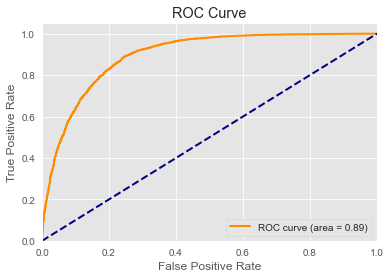

In [392]:
confusion_matrix_c(y_test, y_pred)
print('\n \n Test Classification report \n', classification_report(y_test, y_pred, digits=2))

cv_score = cross_val_score(etc_final,X, y_class, cv=10, scoring="accuracy").mean()
print(f"Cross Validation score at best cv = 10 is : {cv_score*100:.2f}%")
y_predict_probabilities = etc_final.predict_proba(x_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_predict_probabilities)
roc_auc = auc(fpr, tpr)
plot_roc_auc_curve(fpr, tpr)

### Observation:
After Hyperparameter tuning using Gridsearch CV we have improved both test & cross validation score.

<h1 align="center"><font color = "red">Model Saving</font> </h1>

In [393]:
filename='Census.pkl'
pickle.dump(etc_final,open(filename,'wb'))

In [394]:
model =pickle.load(open('Census.pkl','rb'))
pred =model.predict(x_test)
result = pd.DataFrame(list(zip(y_test, pred)), columns = ['Actual', 'Predicted'])
result

,Actual,Predicted
0,1,1
1,0,0
2,1,1
3,0,0
4,0,0
...,...,...
11670,0,0
11671,0,1
11672,0,0
11673,1,1
